# 弹性网络

## 弹性网络的例子

In [10]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(X, y)

print(regr.coef_)
print(regr.intercept_)
print(regr.predict([[0, 0]]))

[18.83816048 64.55968825]
1.4512607561654027
[1.45126076]


## 使用ElasticNetCV

In [11]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X, y)

print(regr.alpha_)
print(regr.intercept_)
print(regr.predict([[0, 0]]))


0.1994727942696716
0.3988829654276791
[0.39888297]


## 弹性网络和Lasso回归在糖尿病数据的研究

In [12]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

In [13]:
# X是442 * 10矩阵
# y是442的数组
X, y = datasets.load_diabetes(return_X_y=True)

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

In [14]:
# Compute paths
eps = 5e-3  # the smaller it is the longer is the path

# 函数 lasso_path 对于lower-level任务非常有用。
# 它能够通过搜索所有可能的路径上的值来计算系数
print("使用lasso计算正则化路径...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, fit_intercept=False)

print("使用正lasso计算正则化路径...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True, fit_intercept=False)
print("使用弹性网络计算正则化路径...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("使用正弹性网络计算正则化路径...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

使用lasso计算正则化路径...
使用正lasso计算正则化路径...
使用弹性网络计算正则化路径...
使用正弹性网络计算正则化路径...


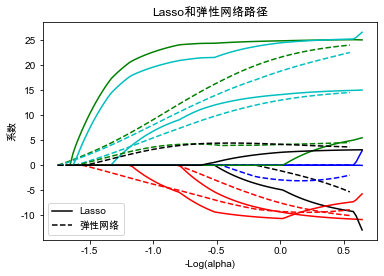

In [15]:
# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
# zip 10* 100, 10* 100 和一个cycle，做10条线
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('系数')
plt.title('Lasso和弹性网络路径')
plt.legend((l1[-1], l2[-1]), ('Lasso', '弹性网络'), loc='lower left')
plt.axis('tight')
plt.show()



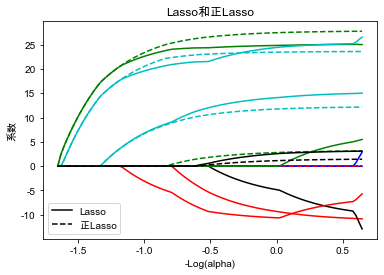

In [16]:
plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('系数')
plt.title('Lasso和正Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', '正Lasso'), loc='lower left')
plt.axis('tight')
plt.show()

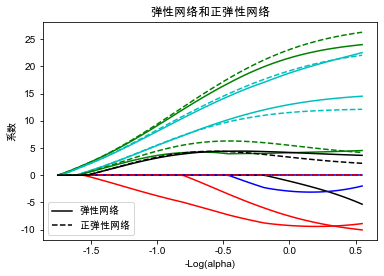

In [17]:

plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('系数')
plt.title('弹性网络和正弹性网络')
plt.legend((l1[-1], l2[-1]), ('弹性网络', '正弹性网络'),
           loc='lower left')
plt.axis('tight')
plt.show()

## 弹性网络和Lasso回归在稀疏矩阵中的比较

Lasso(alpha=0.1)
r^2 on test data : 0.658064
ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.642515


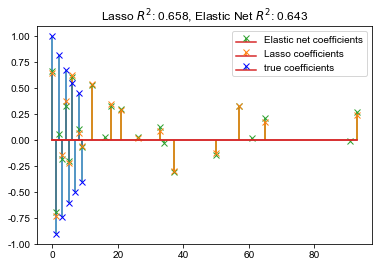

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [19]:
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

In [ ]:
# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

In [ ]:
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

In [ ]:
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients',
                   use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients',
                   use_line_collection=True)
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx', use_line_collection=True)

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

